# Demo Usage of the Generalizer (GENERALization-optimiZER)

The Generalizer optimizes faster by maintaining a n+1 dimensional surrogate model which incorporates the samples of already solved similar problems with shared features. The additional axis is not vital to solve each optimization problem but connects similar problems from the same class. We thus speak from generalizing between optimization problems. We call the n dimensional problems (hyper)slices of the n+1 dimensional surrogate space (intuition: 1D slices of a 2D problem space).

As example function to be optimized we use the Six Hump Camel function. We evaluate slices along the first dimension, the second dimension forms the additional axis which connects related problems in this class.

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import sys
from generalizer import Generalizer
import demo_visualization
import utils
%matplotlib inline

*Exemplary convergence criterion:*

The minimum in y direction was not changed significantly in the last rounds as well as the x position did not change more than a tolerance.

In [2]:
# variables needed to track convergence
y_min = sys.float_info.max
slice_minimas = np.ones(3) * 1e20
last_x = np.array([[-1.0, 0.0],[0.0, -1.0]])


def converged(slice_minimas, y_min, last_x):
    limit = 3
    tol = 0.02
    y_conv = 0 <= slice_minimas[-limit]/y_min - 1 < tol
    x_conv = np.allclose(last_x[-1], last_x[-2], atol=tol)
        
    return y_conv and x_conv

The Generalizer is initialized with data assumed to belong to previous related experiments. Based upon this data a new slice of the surrogate model is evaluated.

In the following the setup is described. Much goes into setting up and scaling the artificial example samples.

In [3]:
# function space
dim = np.array([[-2, -1], [2, 1]])

# quantization in each dimension
grid_size = 101

# for demo purposes we initialized some slices already (in deployment that will be done with existing data)
# the chosen slices must lie within the grid spacing and the final samples be transformed to range [0,1]
initial_slices_single = np.random.choice(np.linspace(dim[0][1], dim[1][1], grid_size), 5, replace=False)
initial_slices = np.repeat(initial_slices_single, 10)
initial_spacing = np.tile(np.linspace(dim[0][0], dim[1][0], 10), 5)
initial_samples_X = np.vstack((initial_spacing, initial_slices)).T
initial_samples_Y = utils.six_hump_camel(initial_samples_X)

# scaling to [0,1]
initial_samples_X = utils.scale_01(initial_samples_X, dim)
initial_slices_single = (initial_slices_single+1.0) / 2.0



# instantiate generalizer with surrogate
print('>>>>>> Randomly initialize with slices: ', initial_slices_single)

generalizer = Generalizer(dim,
                          initial_samples_X=initial_samples_X,
                          initial_samples_Y=initial_samples_Y,
                          grid_size=grid_size)

>>>>>> Randomly initialize with slices:  [ 0.48  0.07  0.87  0.67  0.13]


In the main loop new sampling locations are seeked for and then evaluated. It is the users task to acquire the required samples by experiment or simulation. We simulate this by evaluating the provided Six Hump Camel function.

>>>>>> Optimize slice:  0.29
>>>>>>   Sample  0
Neurotic Natalie tamed - Training error=0.000864462
Neurotic Natalie tamed - Training error=0.002448082
Neurotic Natalie tamed - Training error=0.008660018
Neurotic Natalie tamed - Training error=0.010673158
Neurotic Natalie tamed - Training error=0.010072720
Neurotic Natalie tamed - Training error=0.010297046
Neurotic Natalie tamed - Training error=0.004138949
Neurotic Natalie tamed - Training error=0.011506622
Neurotic Natalie tamed - Training error=0.003520926
Neurotic Natalie tamed - Training error=0.017513759
Neurotic Natalie tamed - Training error=0.005768241


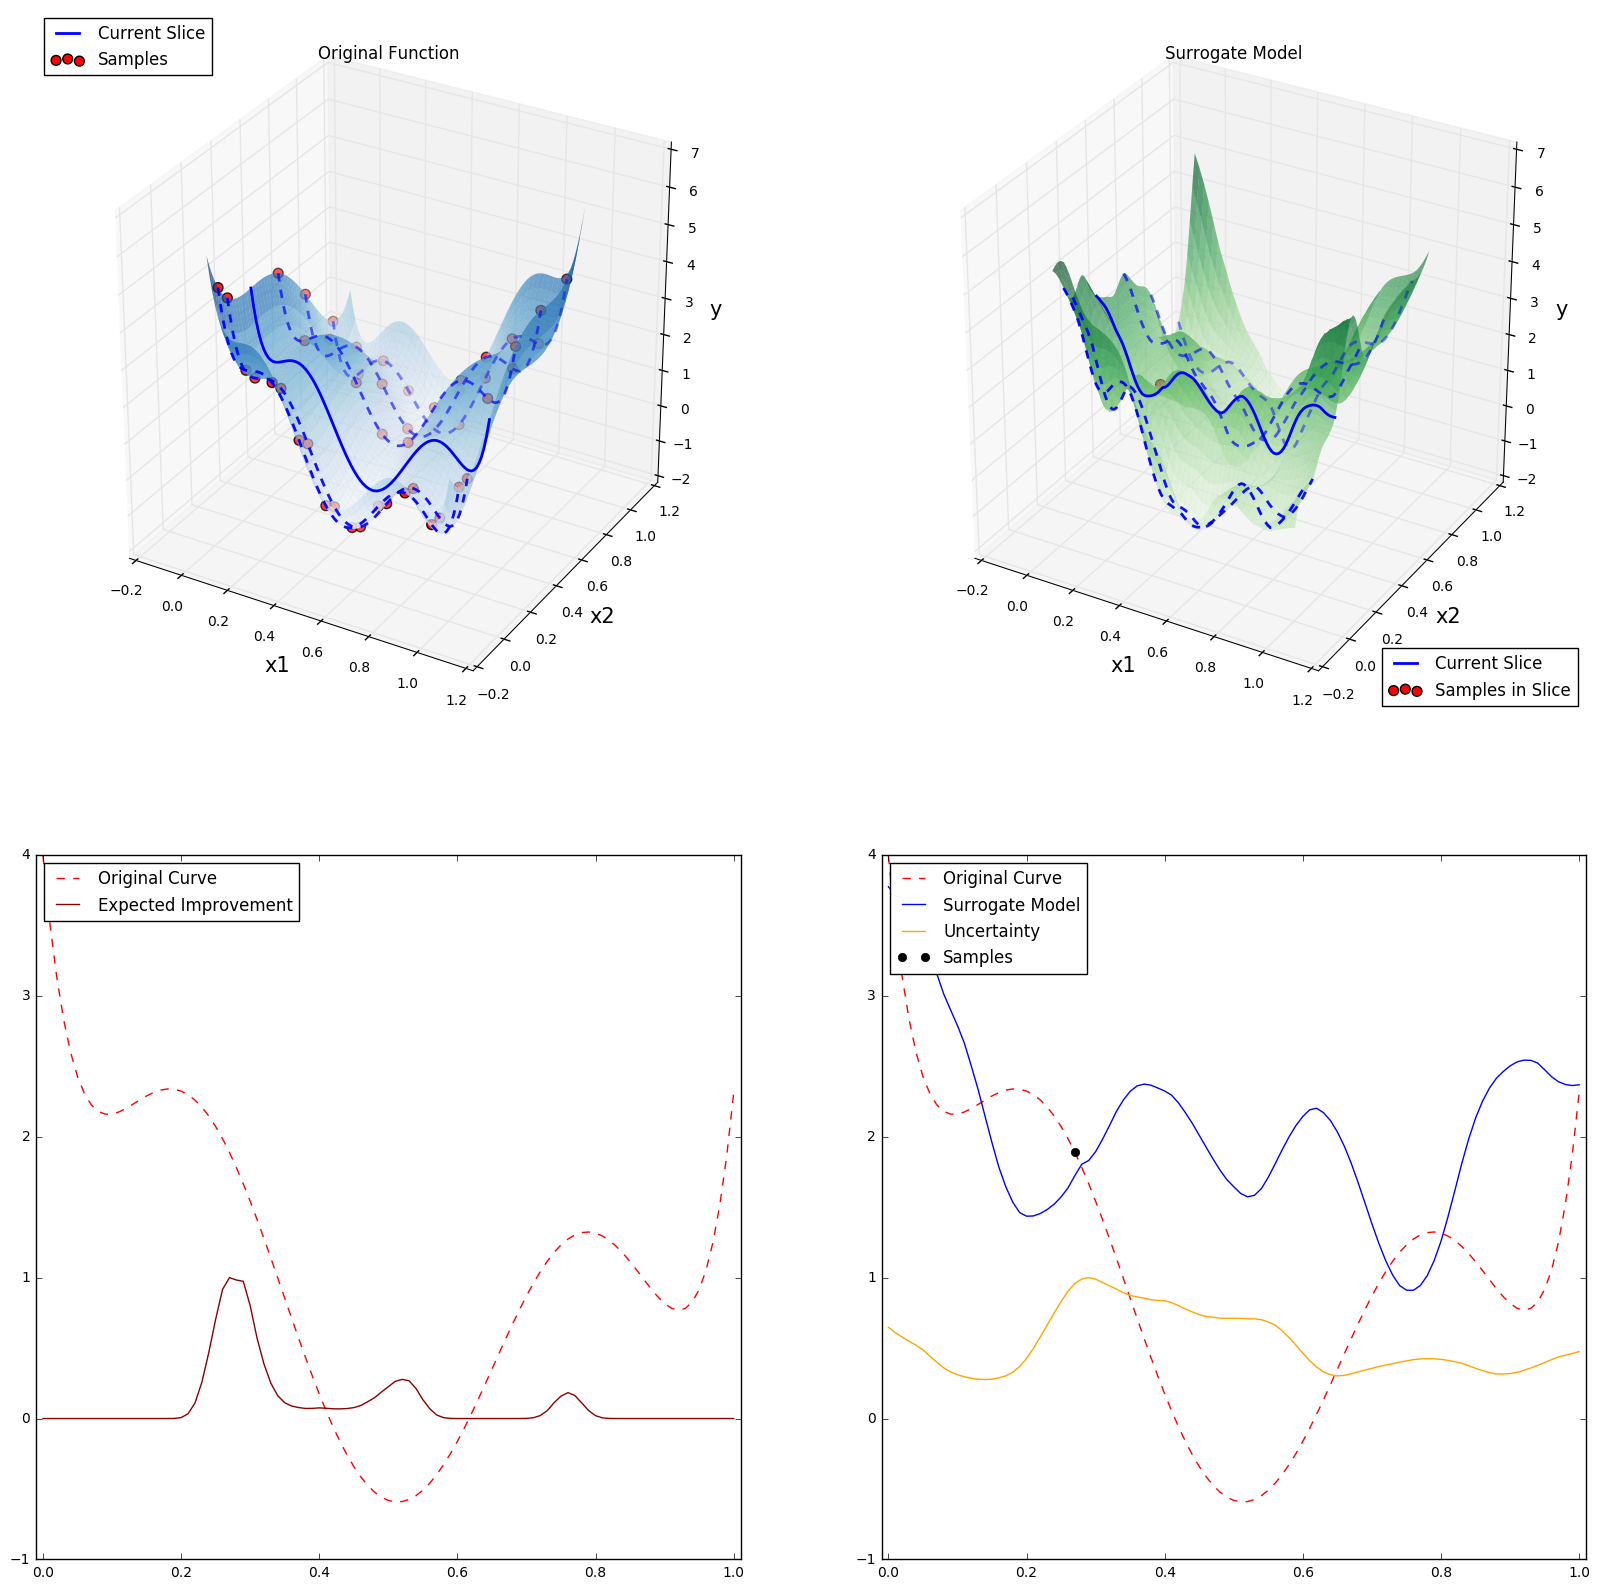

>>>>>>   Sample  1
Neurotic Natalie tamed - Training error=0.000361224
Neurotic Natalie tamed - Training error=0.005033974
Neurotic Natalie tamed - Training error=0.007701648
Neurotic Natalie tamed - Training error=0.010200227
Neurotic Natalie tamed - Training error=0.007142779
Neurotic Natalie tamed - Training error=0.011279518
Neurotic Natalie tamed - Training error=0.008839844
Neurotic Natalie tamed - Training error=0.011376728
Neurotic Natalie tamed - Training error=0.009962833
Neurotic Natalie tamed - Training error=0.019472003
Neurotic Natalie tamed - Training error=0.007020292


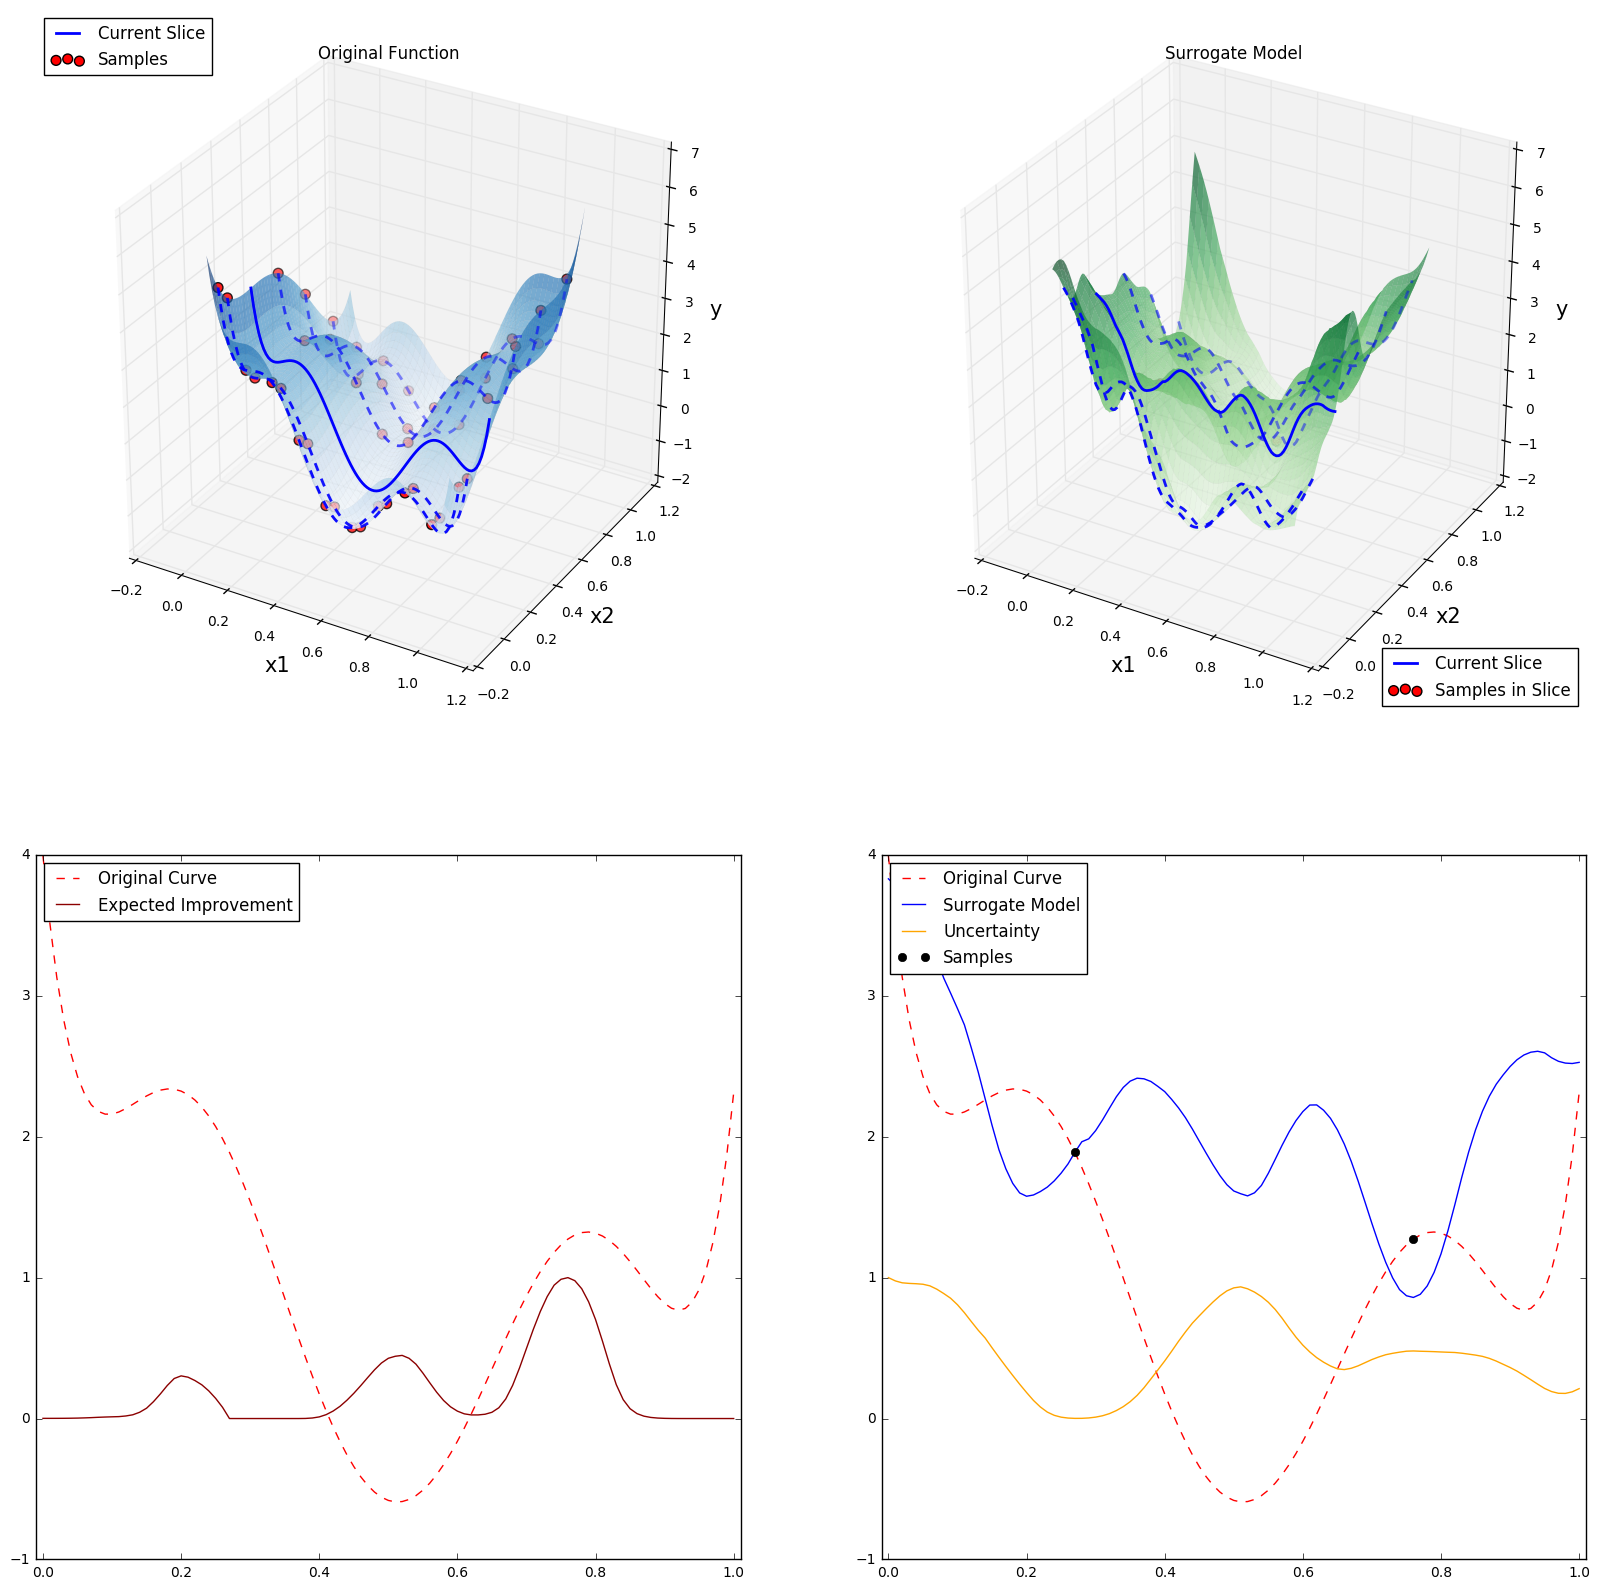

>>>>>>   Sample  2
Neurotic Natalie tamed - Training error=0.000207476
Neurotic Natalie tamed - Training error=0.005637403
Neurotic Natalie tamed - Training error=0.007132989
Neurotic Natalie tamed - Training error=0.020284308
Neurotic Natalie tamed - Training error=0.007727004
Neurotic Natalie tamed - Training error=0.008882833
Neurotic Natalie tamed - Training error=0.009853295
Neurotic Natalie tamed - Training error=0.009119995
Neurotic Natalie tamed - Training error=0.006937452
Neurotic Natalie tamed - Training error=0.004416372
Neurotic Natalie tamed - Training error=0.002047121


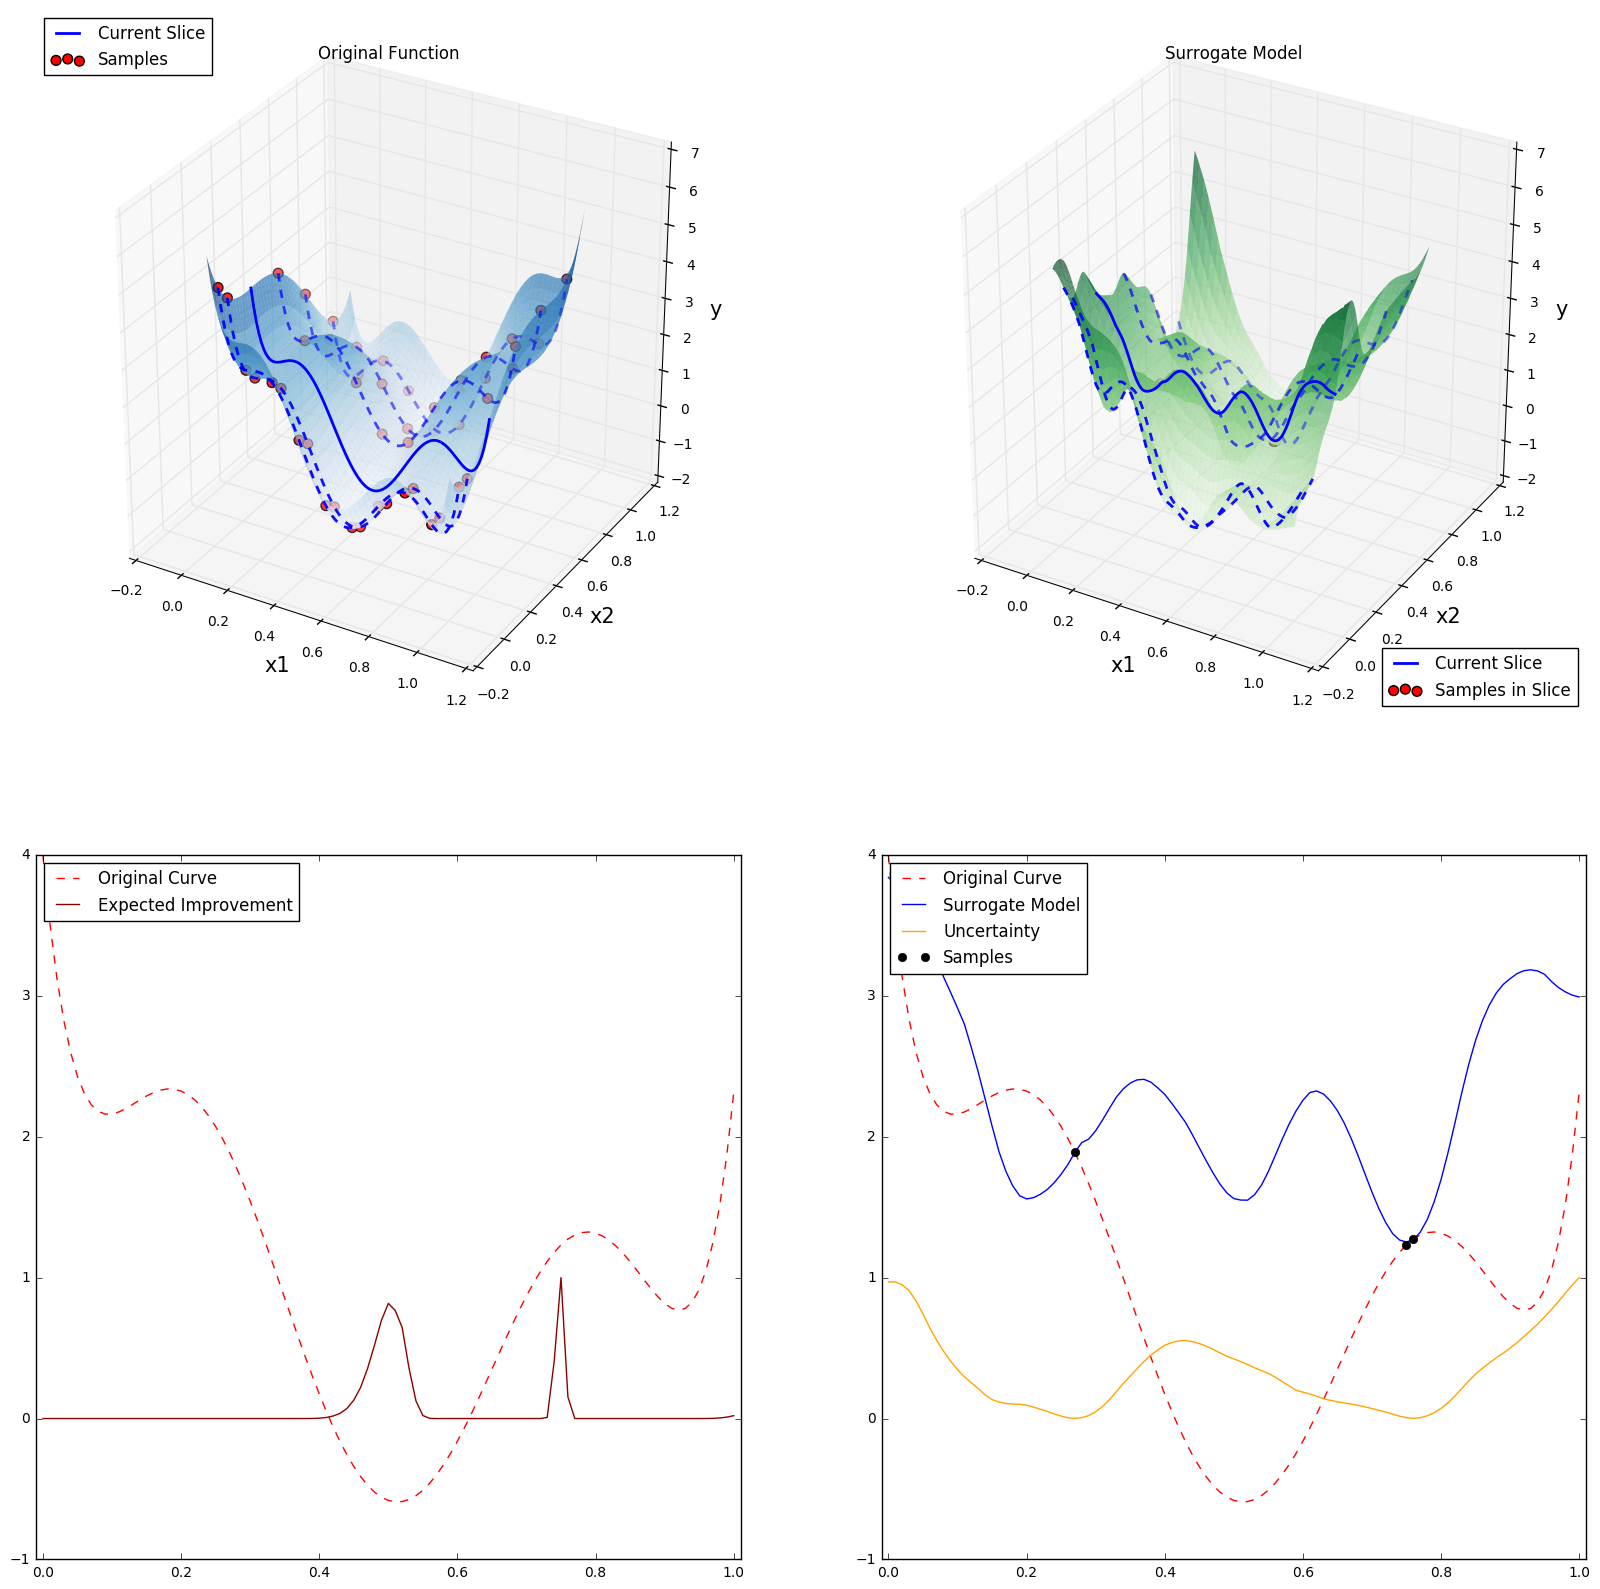

>>>>>>   Sample  3
Neurotic Natalie tamed - Training error=0.000127505
Neurotic Natalie tamed - Training error=0.005334410
Neurotic Natalie tamed - Training error=0.007269534
Neurotic Natalie tamed - Training error=0.003571387
Neurotic Natalie tamed - Training error=0.003806562
Neurotic Natalie tamed - Training error=0.018969398
Neurotic Natalie tamed - Training error=0.007925658
Neurotic Natalie tamed - Training error=0.003619752
Neurotic Natalie tamed - Training error=0.010186566
Neurotic Natalie tamed - Training error=0.007766949
Neurotic Natalie tamed - Training error=0.011881812


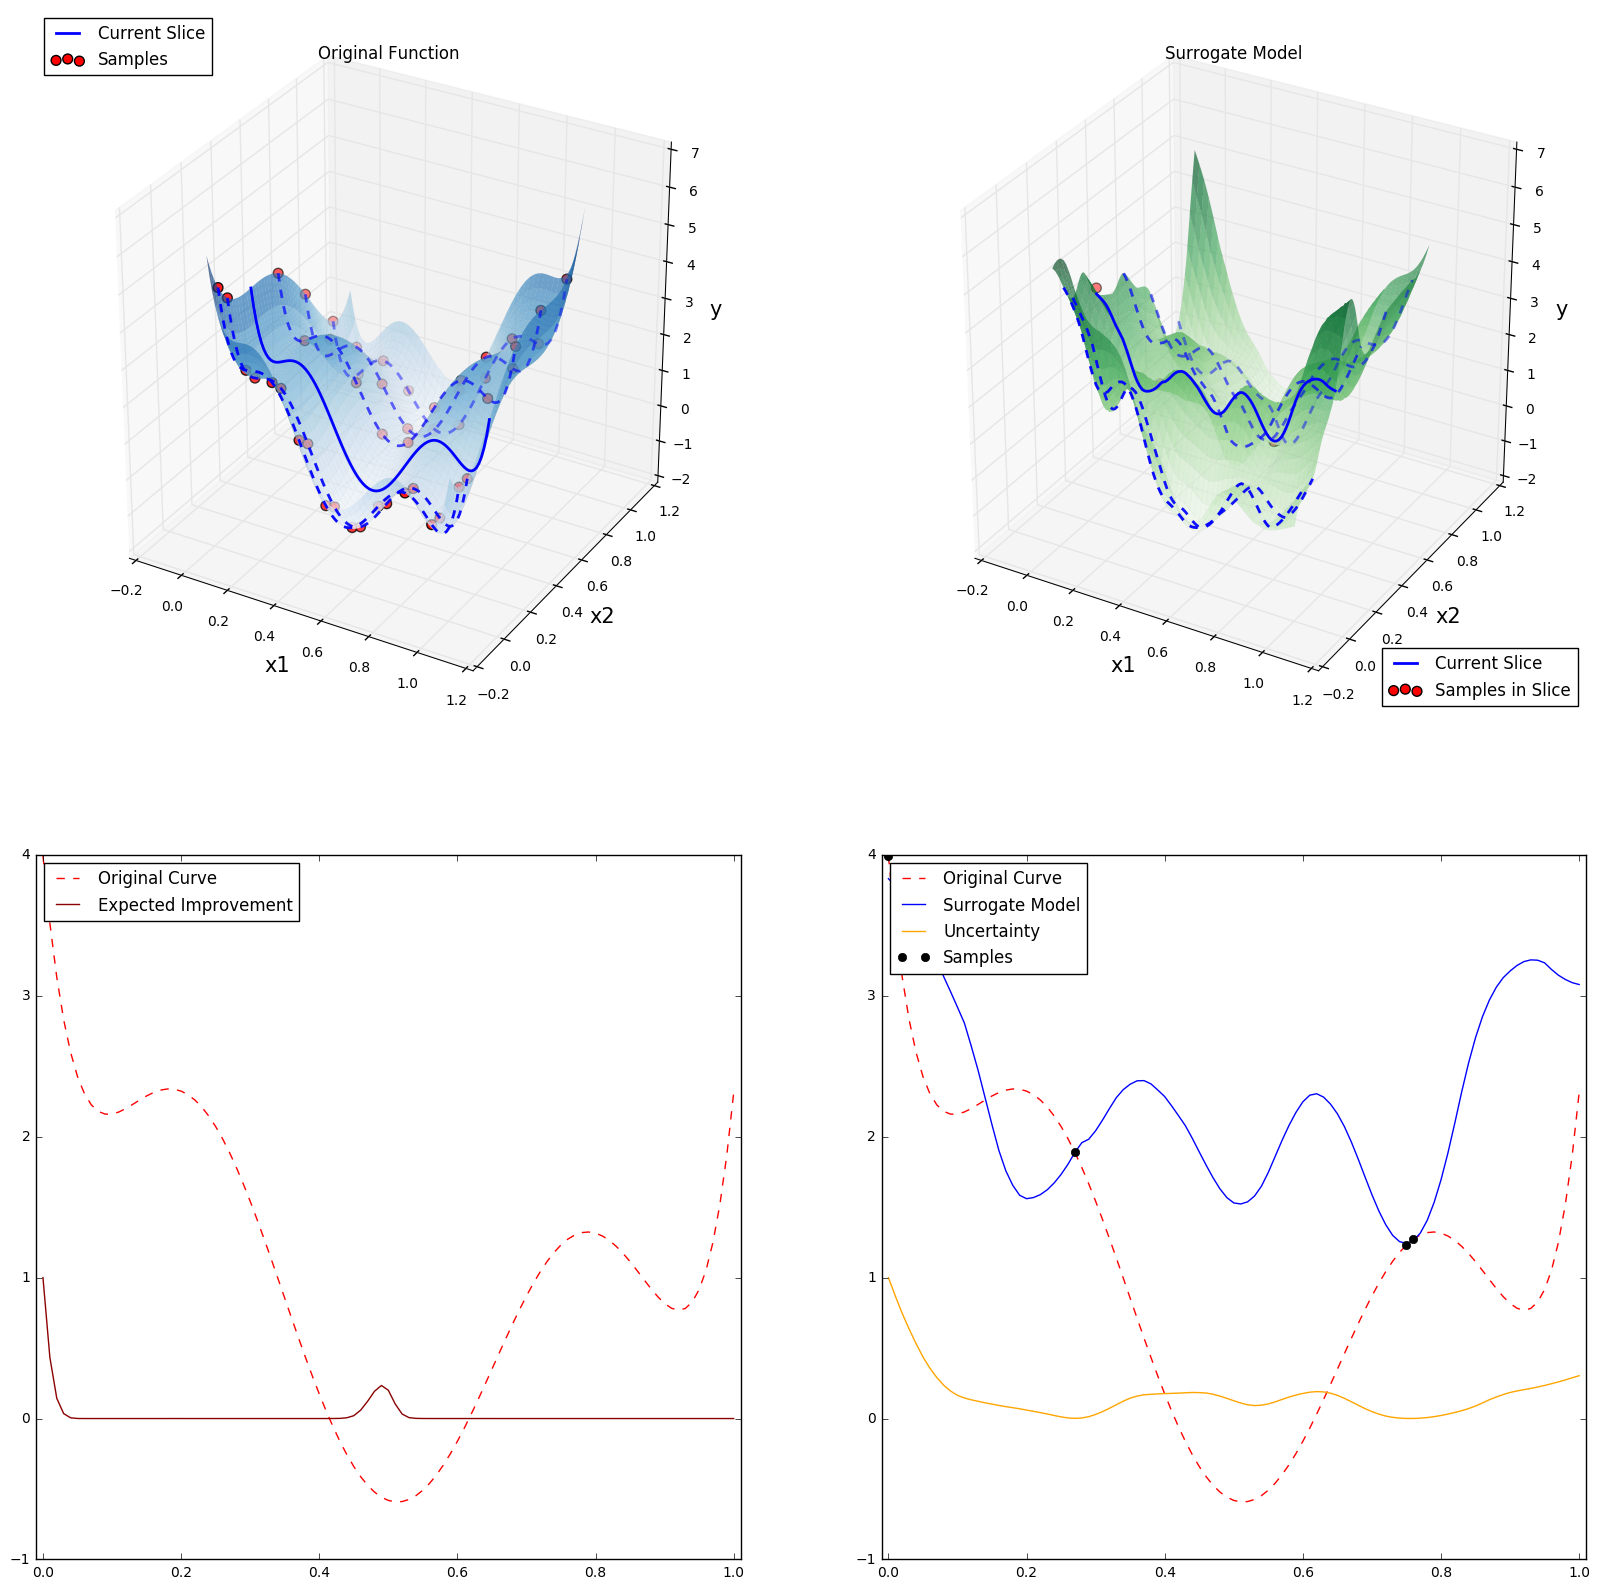

>>>>>>   Sample  4
Neurotic Natalie tamed - Training error=0.000082198
Neurotic Natalie tamed - Training error=0.013203001
Neurotic Natalie tamed - Training error=0.005251211
Neurotic Natalie tamed - Training error=0.010839410
Neurotic Natalie tamed - Training error=0.003725410
Neurotic Natalie tamed - Training error=0.008632760
Neurotic Natalie tamed - Training error=0.005442748
Neurotic Natalie tamed - Training error=0.012289863
Neurotic Natalie tamed - Training error=0.012142061
Neurotic Natalie tamed - Training error=0.004229043
Neurotic Natalie tamed - Training error=0.010288179


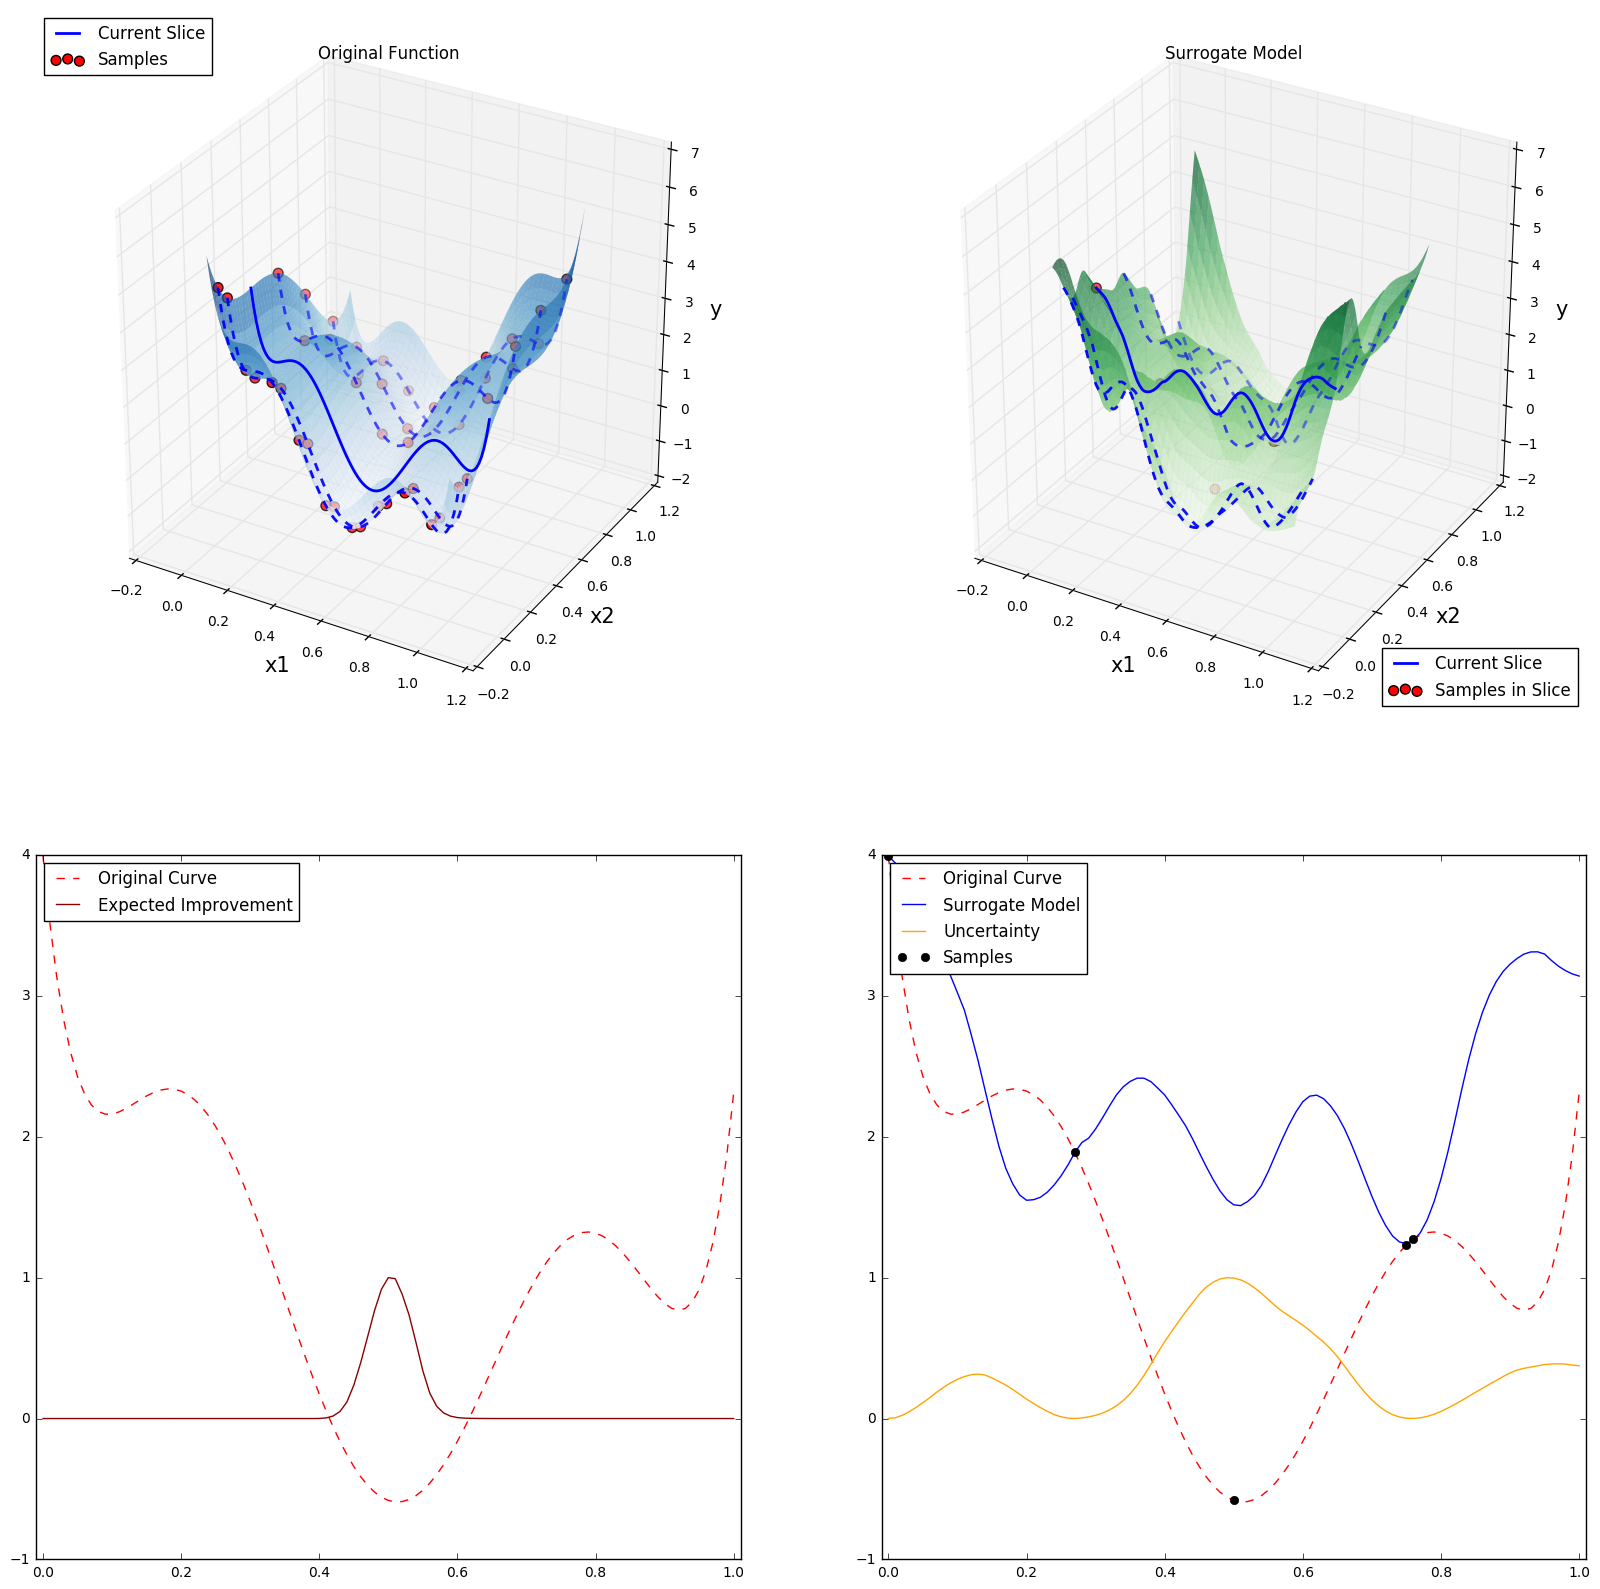

>>>>>>   Sample  5
Neurotic Natalie tamed - Training error=0.000140800
Neurotic Natalie tamed - Training error=0.010629755
Neurotic Natalie tamed - Training error=0.013858468
Neurotic Natalie tamed - Training error=0.005464798
Neurotic Natalie tamed - Training error=0.007741736
Neurotic Natalie tamed - Training error=0.008075132
Neurotic Natalie tamed - Training error=0.021717830
Neurotic Natalie tamed - Training error=0.005788743
Neurotic Natalie tamed - Training error=0.007354345
Neurotic Natalie tamed - Training error=0.013284563
Neurotic Natalie tamed - Training error=0.008760355


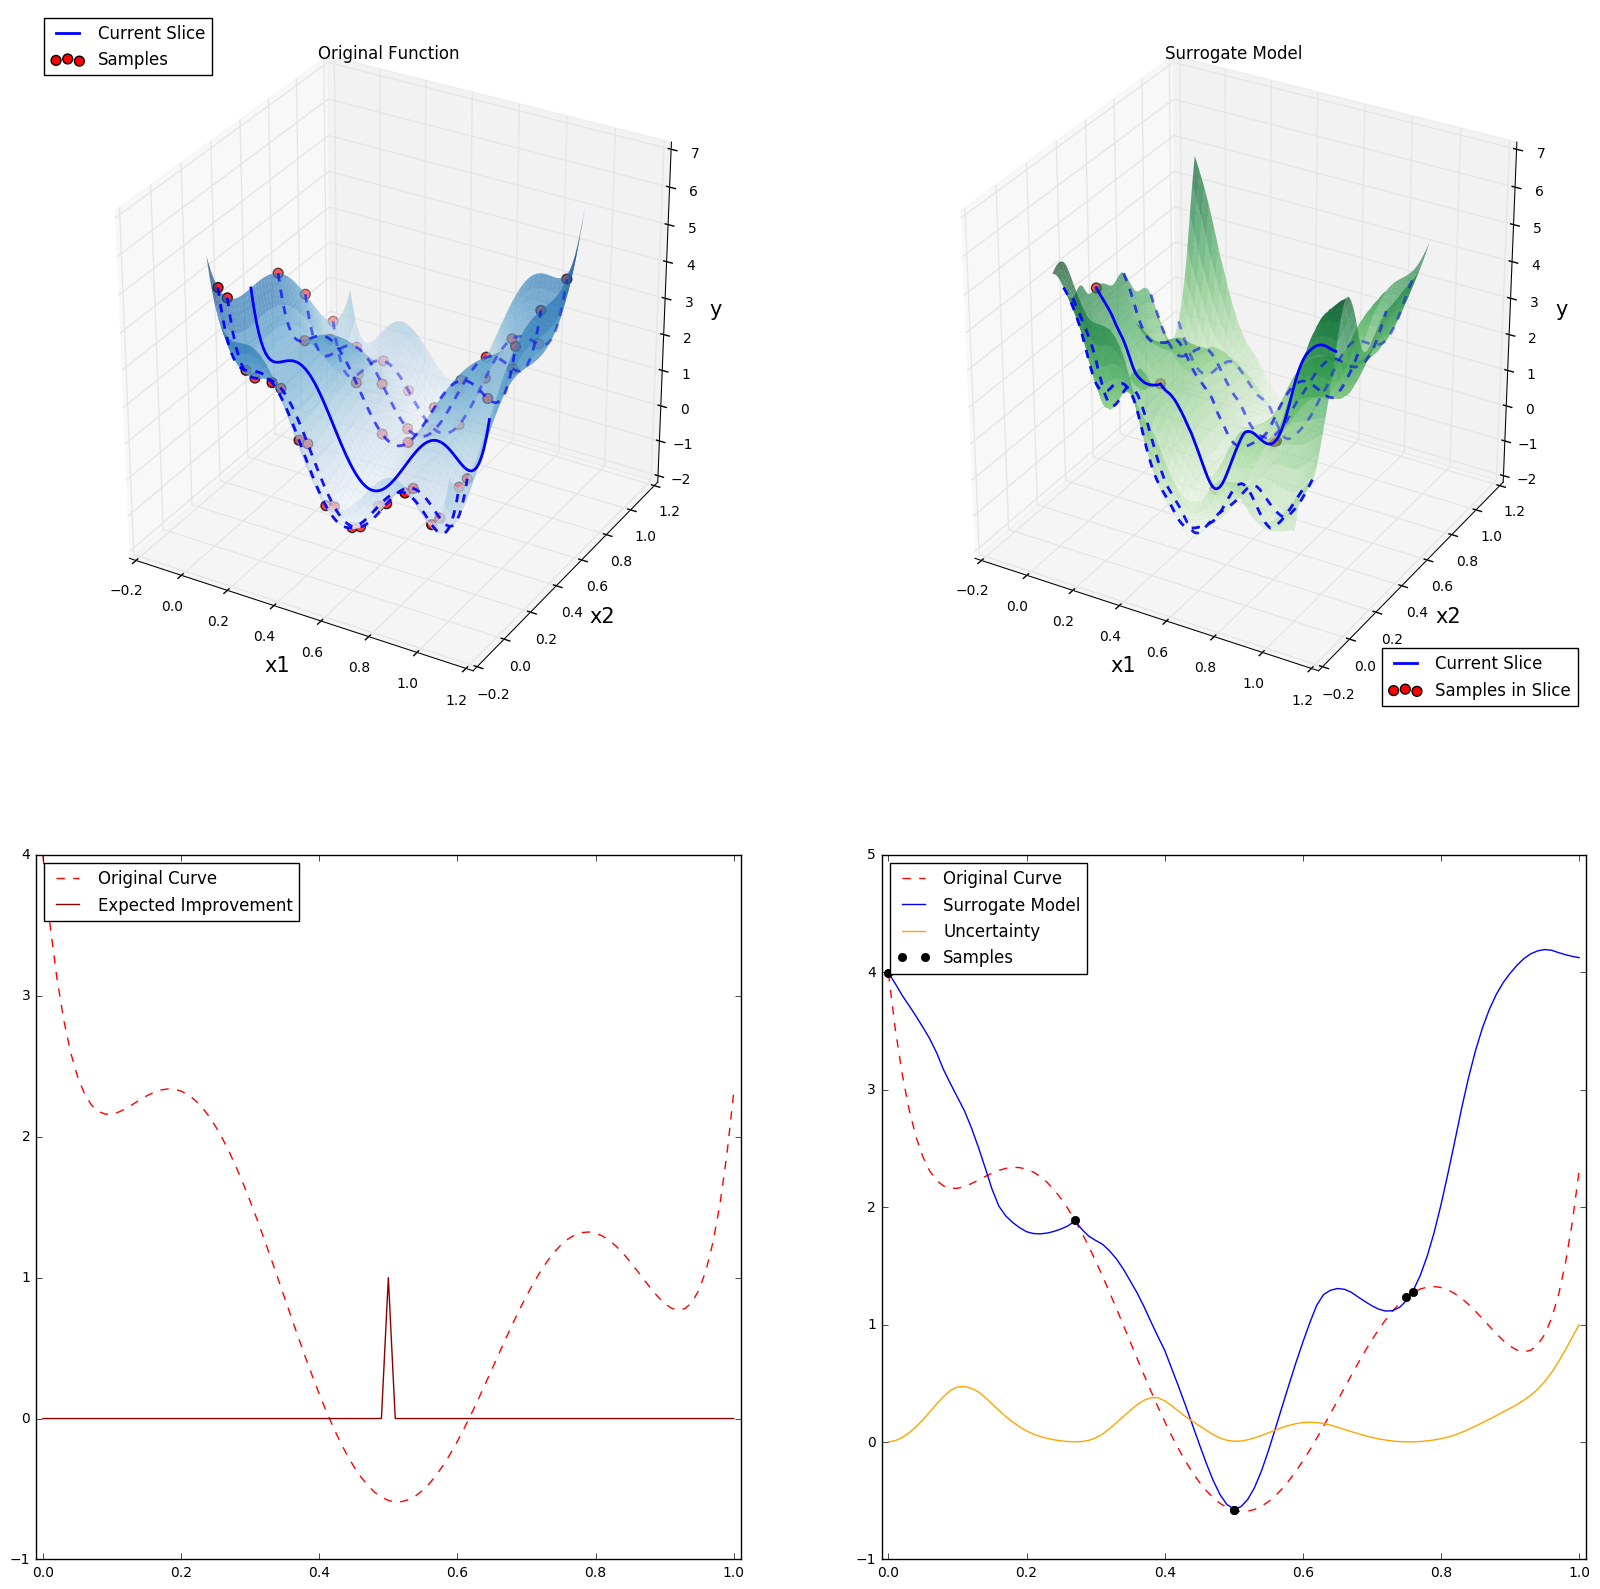

>>>>>>   Sample  6
Neurotic Natalie tamed - Training error=0.000076006
Neurotic Natalie tamed - Training error=0.008024705
Neurotic Natalie tamed - Training error=0.006940144
Neurotic Natalie tamed - Training error=0.008034128
Neurotic Natalie tamed - Training error=0.008224037
Neurotic Natalie tamed - Training error=0.010152970
Neurotic Natalie tamed - Training error=0.013931334
Neurotic Natalie tamed - Training error=0.005367098
Neurotic Natalie tamed - Training error=0.021674603
Neurotic Natalie tamed - Training error=0.011621015
Neurotic Natalie tamed - Training error=0.013407514


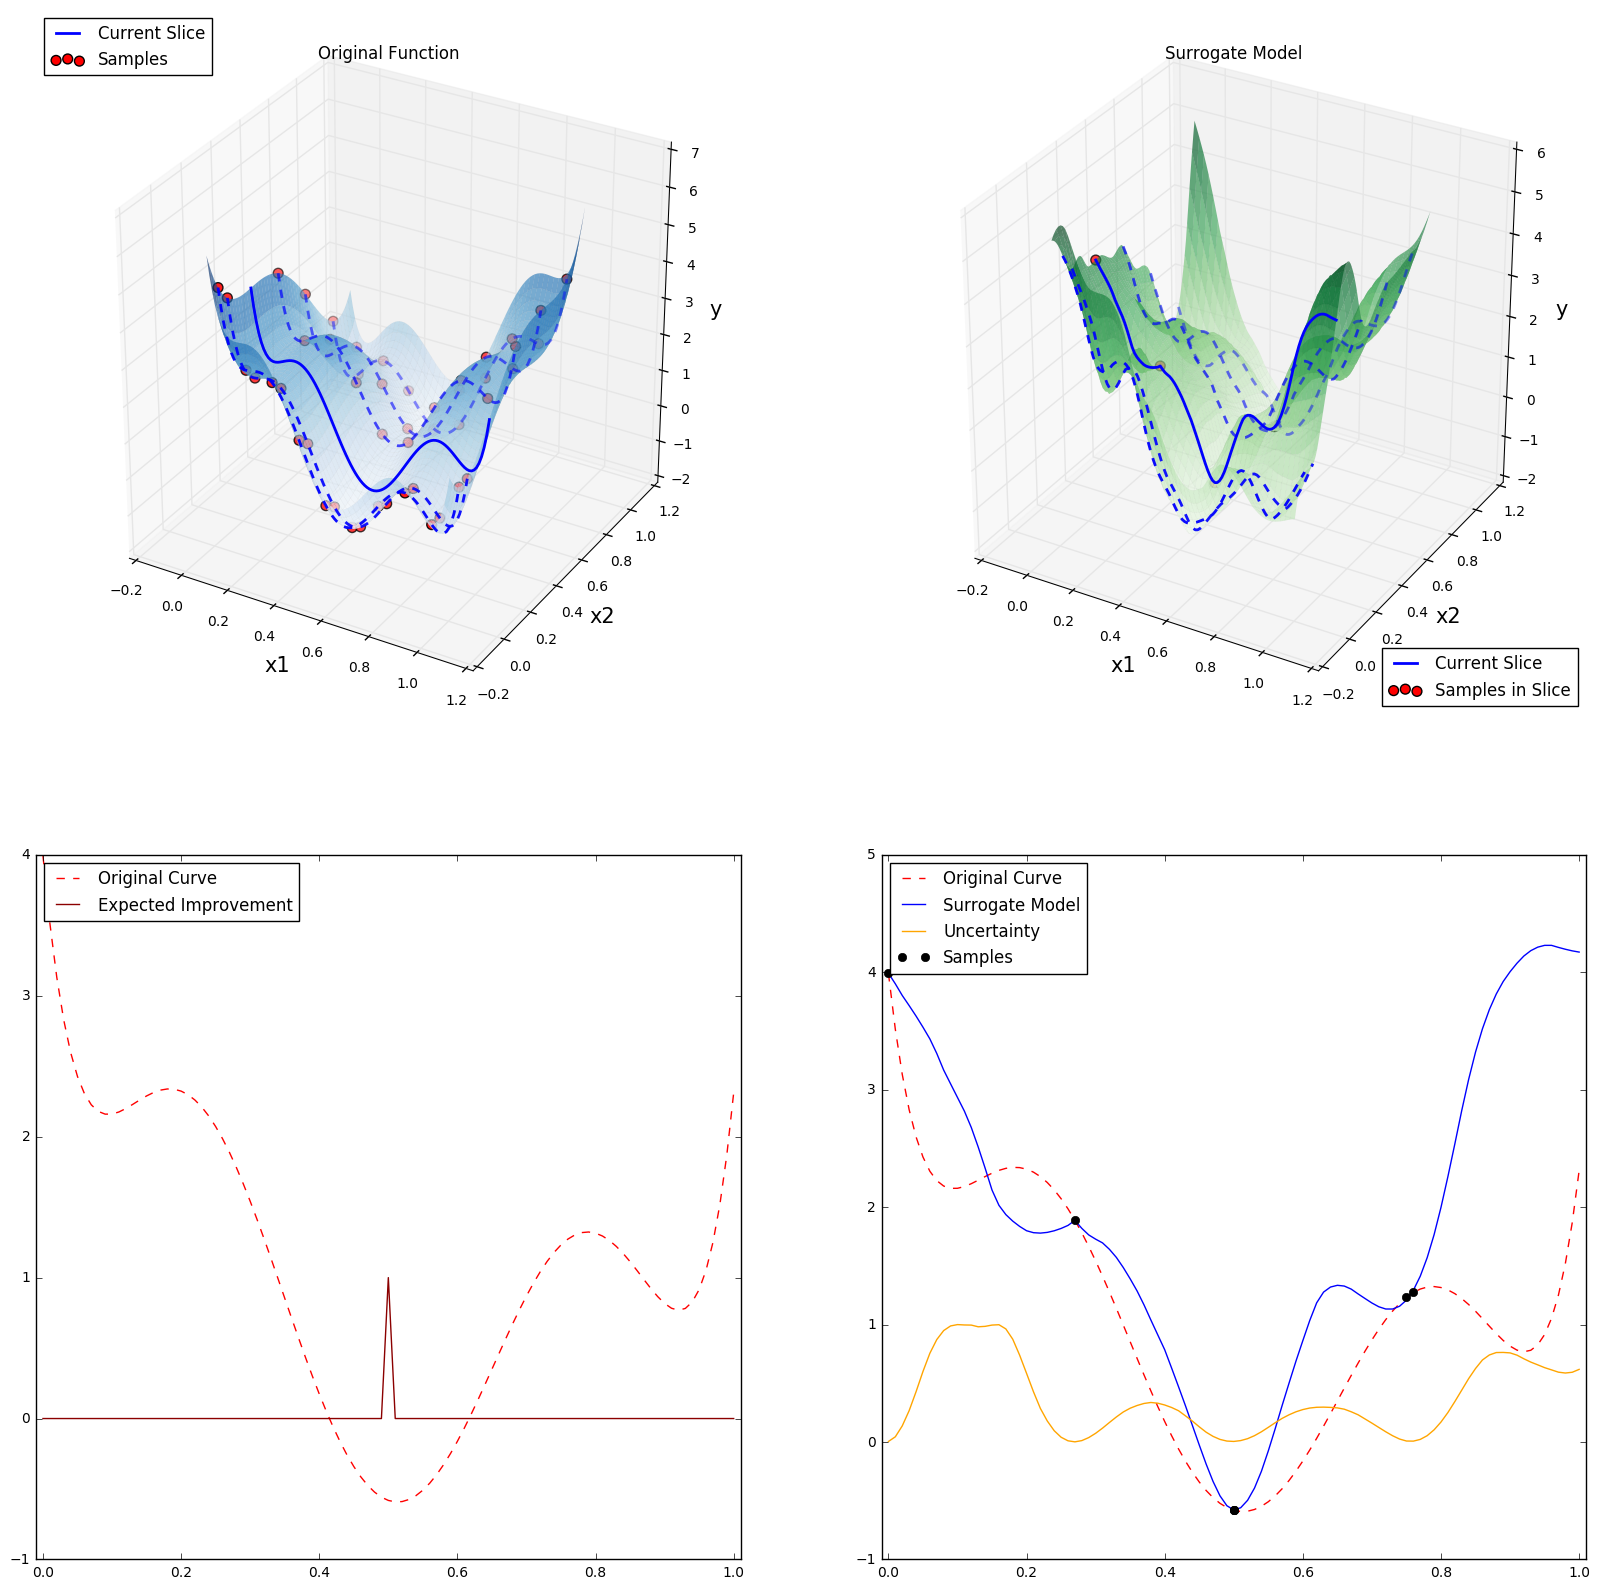

>>>>>> FINISHED! Samples until convergence:  7
>>>>>> Minimum -0.581132 at position  [ 0.5   0.29]


In [4]:
# loop to optimize current slice
current_slice = np.random.choice(np.linspace(0, 1, grid_size))
print('>>>>>> Optimize slice: ', current_slice)
i = 0

while not converged(slice_minimas, y_min, last_x):
    print('>>>>>>   Sample ', i)

    # get next evaluation location
    new_x, proof = generalizer.get_next_sampling_location(current_slice)

    # evaluate six hump to get new sample
    original_scale_new_x = utils.scale_restore(np.matrix(new_x), dim)
    new_y = utils.six_hump_camel(np.array(original_scale_new_x).squeeze())

    # incorporate into surrogate model
    generalizer.incorporate_new_sample(new_x, new_y)

    # update convergence variables
    slice_samples_X, slice_samples_Y = generalizer.get_samples_for(current_slice)
    y_min = np.min(slice_samples_Y)
    slice_minimas = np.append(slice_minimas, y_min)
    last_x = np.vstack((last_x, new_x))

    # visualize results
    demo_visualization.plot(proof, current_slice, grid_size, dim, slice_samples_X, slice_samples_Y, 
                            initial_slices_single, initial_samples_X, initial_samples_Y)

    i += 1


print('>>>>>> FINISHED! Samples until convergence: ', i)
print('>>>>>> Minimum %f at position '%y_min, last_x[-1])